In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from pandas import DataFrame, Series

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
%matplotlib inline

In [7]:
c_cycle=("#3498db","#e74c3c","#1abc9c","#9b59b6","#f1c40f","#ecf0f1","#34495e",
                  "#446cb3","#d24d57","#27ae60","#663399", "#f7ca18","#bdc3c7","#2c3e50")
mpl.rc('font', family='Bitstream Vera Sans', size=20)
mpl.rc('lines', linewidth=2,color="#2c3e50")
mpl.rc('patch', linewidth=0,facecolor="none",edgecolor="none")
mpl.rc('text', color='#2c3e50')
mpl.rc('axes', facecolor='none',edgecolor="none",titlesize=25,labelsize=15,color_cycle=c_cycle,grid=False)
mpl.rc('xtick.major',size=10,width=0)
mpl.rc('ytick.major',size=10,width=0)
mpl.rc('xtick.minor',size=10,width=0)
mpl.rc('ytick.minor',size=10,width=0)
mpl.rc('ytick',direction="out")
mpl.rc('grid',color='#c0392b',alpha=0.3,linewidth=1)
mpl.rc('legend',numpoints=3,fontsize=15,borderpad=0,markerscale=3,labelspacing=0.2,frameon=False,framealpha=0.6,handlelength=1,handleheight=0.5)
mpl.rc('figure',figsize=(10,6),dpi=80,facecolor="none",edgecolor="none")
mpl.rc('savefig',dpi=100,facecolor="none",edgecolor="none")

Changed design

###Plot the daily temperature over the course of the year. (This should probably be a line chart.) Create a bar chart that shows the average temperature and humidity by month.

In [8]:
weather = pd.read_table("daily_weather.tsv")


In [9]:
usage = pd.read_table("usage_2012.tsv")

In [41]:
station = pd.read_table("stations.tsv")

In [11]:
weather.loc[weather['season_code'] == 1, 'season_desc'] = 'winter'

In [12]:
weather.loc[weather['season_code'] == 2, 'season_desc'] = 'spring'

In [13]:
weather.loc[weather['season_code'] == 3, 'season_desc'] = 'summer'

In [14]:
weather.loc[weather['season_code'] == 4, 'season_desc'] = 'fall'

In [15]:
weather['date'] = pd.to_datetime(weather['date'])

In [16]:
month_rental = weather.groupby(weather['date'].dt.month)['total_riders'].sum()


In [17]:
mean = weather.groupby('season_desc')['temp'].mean()

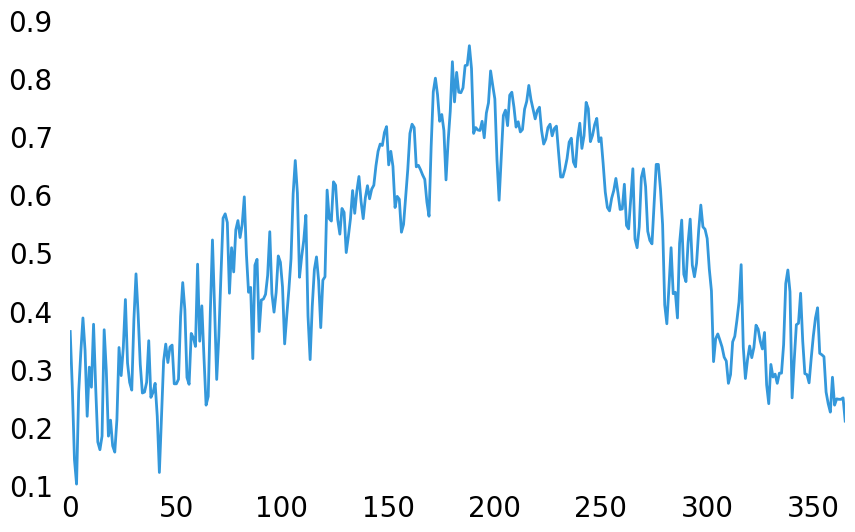

In [18]:
weather['temp'].plot()

In [19]:
weather['month'] = pd.DatetimeIndex(weather.date).month

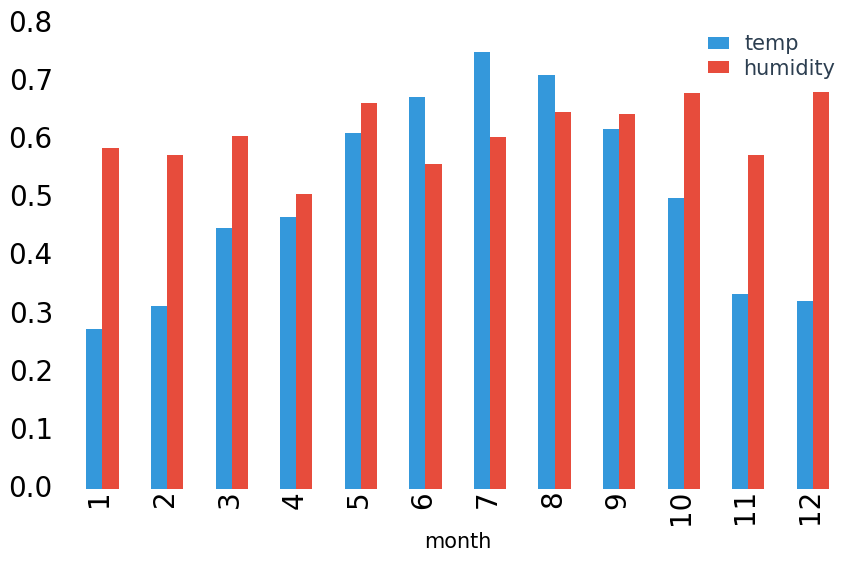

In [20]:
weather.groupby('month')['temp', 'humidity'].mean().plot(kind='bar')


###2.Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

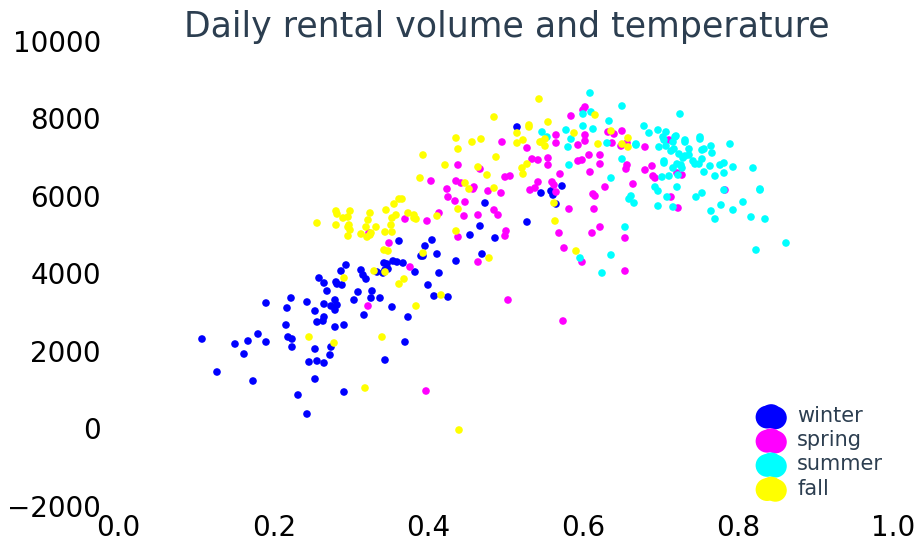

In [21]:
plt.scatter(
    weather[weather['season_desc'] == 'winter']['temp'],
    weather[weather['season_desc'] == 'winter']['total_riders'],
    s=30, color='blue', label='winter'
)
plt.scatter(
    weather[weather['season_desc'] == 'spring']['temp'],
    weather[weather['season_desc'] == 'spring']['total_riders'],
    s=30, color='magenta', label='spring'
)
plt.scatter(
    weather[weather['season_desc'] == 'summer']['temp'],
    weather[weather['season_desc'] == 'summer']['total_riders'],
    s=30, color='cyan', label='summer'
)
plt.scatter(
    weather[weather['season_desc'] == 'fall']['temp'],
    weather[weather['season_desc'] == 'fall']['total_riders'],
    s=30, color='yellow', label='fall'
)
plt.title("Daily rental volume and temperature")
plt.legend(loc=4)
plt.show()

###3.Create another scatterplot to show how daily rental volume varies with windspeed.  As above, use a different series for each season.

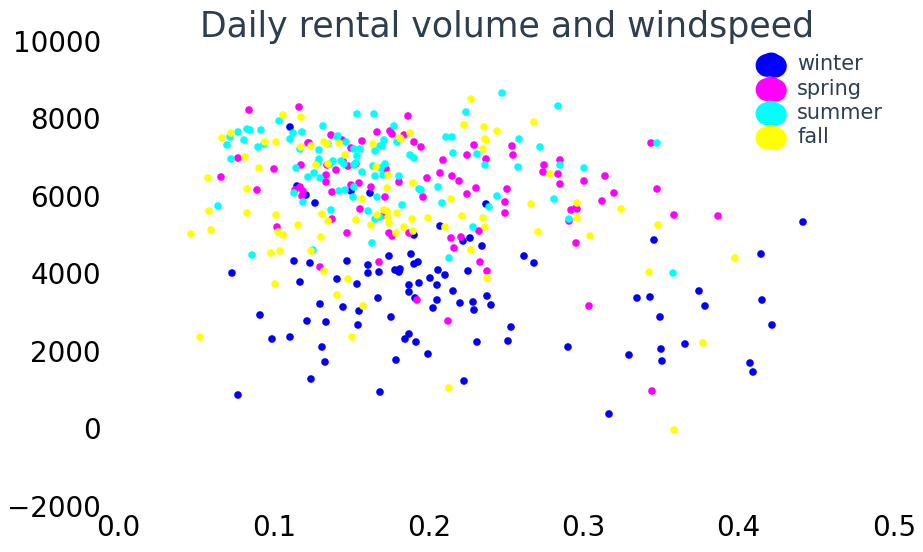

In [27]:
plt.scatter(
    weather[weather['season_desc'] == 'winter']['windspeed'],
    weather[weather['season_desc'] == 'winter']['total_riders'],
    s=30, color='blue', label='winter'
)
plt.scatter(
    weather[weather['season_desc'] == 'spring']['windspeed'],
    weather[weather['season_desc'] == 'spring']['total_riders'],
    s=30, color='magenta', label='spring'
)
plt.scatter(
    weather[weather['season_desc'] == 'summer']['windspeed'],
    weather[weather['season_desc'] == 'summer']['total_riders'],
    s=30, color='cyan', label='summer'
)
plt.scatter(
    weather[weather['season_desc'] == 'fall']['windspeed'],
    weather[weather['season_desc'] == 'fall']['total_riders'],
    s=30, color='yellow', label='fall'
)
plt.title("Daily rental volume and windspeed")
plt.legend(loc=1)
plt.show()

###4.How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.

In [42]:
station

,id,station,terminal_name,lat,long,no_bikes,no_empty_docks,fast_food,parking,restaurant,...,museum,sculpture,hostel,picnic_site,tour_guide,attraction,landmark,motel,guest_house,gallery
0,1,20th & Bell St,31000,38.856100,-77.051200,7,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18th & Eads St.,31001,38.857250,-77.053320,6,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,20th & Crystal Dr,31002,38.856400,-77.049200,9,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15th & Crystal Dr,31003,38.860170,-77.049593,4,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Aurora Hills Community Ctr/18th & Hayes St,31004,38.857866,-77.059490,5,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Pentagon City Metro / 12th & S Hayes St,31005,38.862303,-77.059936,8,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,S Joyce & Army Navy Dr,31006,38.863700,-77.063300,7,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Crystal City Metro / 18th & Bell St,31007,38.857300,-77.051100,11,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,12th & Army Navy Dr,31008,38.862900,-77.052800,3,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,27th & Crystal Dr,31009,38.848441,-77.051516,6,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
station['lat']

0      38.856100
1      38.857250
2      38.856400
3      38.860170
4      38.857866
5      38.862303
6      38.863700
7      38.857300
8      38.862900
9      38.848441
10     38.842600
11     38.853300
12     38.850688
13     38.900300
14     38.917600
15     38.929464
16     38.926088
17     38.922925
18     38.926800
19     38.923203
20     38.931900
21     38.876700
22     38.909850
23     38.912682
24     38.908600
25     38.896300
26     38.900800
27     38.936043
28     38.937500
29     38.934600
         ...    
317    39.084379
318    38.984691
319    38.889920
320    38.903582
321    38.804378
322    38.894941
323    38.869442
324    38.898404
325    38.897612
326    38.901755
327    38.801111
328    38.821750
329    38.802677
330    38.820064
331    38.825950
332    38.820932
333    38.833077
334    38.890612
335    38.986743
336    38.864702
337    38.964970
338    38.903810
339    38.898410
340    38.997653
341    38.912648
342    38.859254
343    38.908008
344    38.8959

In [29]:
station_loc = station[['station', 'lat', 'long']]

In [30]:
station_loc

,station,lat,long
0,20th & Bell St,38.856100,-77.051200
1,18th & Eads St.,38.857250,-77.053320
2,20th & Crystal Dr,38.856400,-77.049200
3,15th & Crystal Dr,38.860170,-77.049593
4,Aurora Hills Community Ctr/18th & Hayes St,38.857866,-77.059490
5,Pentagon City Metro / 12th & S Hayes St,38.862303,-77.059936
6,S Joyce & Army Navy Dr,38.863700,-77.063300
7,Crystal City Metro / 18th & Bell St,38.857300,-77.051100
8,12th & Army Navy Dr,38.862900,-77.052800
9,27th & Crystal Dr,38.848441,-77.051516


In [31]:
usage

,bike_id,time_start,time_end,duration_mins,station_start,station_end,cust_type
0,W01412,2012-01-01 00:04:00,2012-01-01 00:11:00,7,7th & R St NW / Shaw Library,7th & T St NW,Registered
1,W00524,2012-01-01 00:10:00,2012-01-01 00:29:00,19,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual
2,W00235,2012-01-01 00:10:00,2012-01-01 00:29:00,19,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Registered
3,W00864,2012-01-01 00:15:00,2012-01-01 00:23:00,8,14th & V St NW,Park Rd & Holmead Pl NW,Registered
4,W00995,2012-01-01 00:15:00,2012-01-01 00:23:00,8,11th & Kenyon St NW,7th & T St NW,Registered
5,W00466,2012-01-01 00:17:00,2012-01-01 00:23:00,6,Court House Metro / 15th & N Uhle St,Lynn & 19th St North,Registered
6,W00525,2012-01-01 00:18:00,2012-01-01 00:47:00,29,37th & O St NW / Georgetown University,9th & Upshur St NW,Registered
7,W00340,2012-01-01 00:22:00,2012-01-01 00:27:00,5,14th & V St NW,15th & P St NW,Registered
8,W00466,2012-01-01 00:24:00,2012-01-01 00:33:00,9,Lynn & 19th St North,25th St & Pennsylvania Ave NW,Registered
9,W00963,2012-01-01 00:25:00,2012-01-01 00:40:00,15,14th & V St NW,L'Enfant Plaza / 7th & C St SW,Registered


In [48]:
count = usage['station_start'].value_counts()

In [51]:
average = count / 365

In [52]:
average

Massachusetts Ave & Dupont Circle NW                   191.369863
Columbus Circle / Union Station                        151.084932
15th & P St NW                                         135.386301
17th & Corcoran St NW                                  119.306849
14th & V St NW                                         110.252055
Adams Mill & Columbia Rd NW                            110.087671
Thomas Circle                                          109.865753
Eastern Market Metro / Pennsylvania Ave & 7th St SE    108.884932
16th & Harvard St NW                                    95.531507
21st & I St NW                                          91.000000
20th St & Florida Ave NW                                87.536986
North Capitol St & F St NW                              87.175342
14th & Rhode Island Ave NW                              87.019178
7th & F St NW / National Portrait Gallery               86.493151
8th & H St NW                                           85.638356
Metro Cent

In [53]:
count

Massachusetts Ave & Dupont Circle NW                   69850
Columbus Circle / Union Station                        55146
15th & P St NW                                         49416
17th & Corcoran St NW                                  43547
14th & V St NW                                         40242
Adams Mill & Columbia Rd NW                            40182
Thomas Circle                                          40101
Eastern Market Metro / Pennsylvania Ave & 7th St SE    39743
16th & Harvard St NW                                   34869
21st & I St NW                                         33215
20th St & Florida Ave NW                               31951
North Capitol St & F St NW                             31819
14th & Rhode Island Ave NW                             31762
7th & F St NW / National Portrait Gallery              31570
8th & H St NW                                          31258
Metro Center / 12th & G St NW                          30826
Lincoln Park / 13th & Ea

###How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from pandas import DataFrame, Series

In [4]:
usage = pd.read_table("usage_2012.tsv")

In [5]:
usage

,bike_id,time_start,time_end,duration_mins,station_start,station_end,cust_type
0,W01412,2012-01-01 00:04:00,2012-01-01 00:11:00,7,7th & R St NW / Shaw Library,7th & T St NW,Registered
1,W00524,2012-01-01 00:10:00,2012-01-01 00:29:00,19,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual
2,W00235,2012-01-01 00:10:00,2012-01-01 00:29:00,19,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Registered
3,W00864,2012-01-01 00:15:00,2012-01-01 00:23:00,8,14th & V St NW,Park Rd & Holmead Pl NW,Registered
4,W00995,2012-01-01 00:15:00,2012-01-01 00:23:00,8,11th & Kenyon St NW,7th & T St NW,Registered
5,W00466,2012-01-01 00:17:00,2012-01-01 00:23:00,6,Court House Metro / 15th & N Uhle St,Lynn & 19th St North,Registered
6,W00525,2012-01-01 00:18:00,2012-01-01 00:47:00,29,37th & O St NW / Georgetown University,9th & Upshur St NW,Registered
7,W00340,2012-01-01 00:22:00,2012-01-01 00:27:00,5,14th & V St NW,15th & P St NW,Registered
8,W00466,2012-01-01 00:24:00,2012-01-01 00:33:00,9,Lynn & 19th St North,25th St & Pennsylvania Ave NW,Registered
9,W00963,2012-01-01 00:25:00,2012-01-01 00:40:00,15,14th & V St NW,L'Enfant Plaza / 7th & C St SW,Registered


In [6]:
station = pd.read_table("stations.tsv")

In [7]:
station

,id,station,terminal_name,lat,long,no_bikes,no_empty_docks,fast_food,parking,restaurant,...,museum,sculpture,hostel,picnic_site,tour_guide,attraction,landmark,motel,guest_house,gallery
0,1,20th & Bell St,31000,38.856100,-77.051200,7,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18th & Eads St.,31001,38.857250,-77.053320,6,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,20th & Crystal Dr,31002,38.856400,-77.049200,9,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15th & Crystal Dr,31003,38.860170,-77.049593,4,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Aurora Hills Community Ctr/18th & Hayes St,31004,38.857866,-77.059490,5,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Pentagon City Metro / 12th & S Hayes St,31005,38.862303,-77.059936,8,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,S Joyce & Army Navy Dr,31006,38.863700,-77.063300,7,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,Crystal City Metro / 18th & Bell St,31007,38.857300,-77.051100,11,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,12th & Army Navy Dr,31008,38.862900,-77.052800,3,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,27th & Crystal Dr,31009,38.848441,-77.051516,6,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
stations = station [['station', 'lat', 'long']]


In [9]:
stations

,station,lat,long
0,20th & Bell St,38.856100,-77.051200
1,18th & Eads St.,38.857250,-77.053320
2,20th & Crystal Dr,38.856400,-77.049200
3,15th & Crystal Dr,38.860170,-77.049593
4,Aurora Hills Community Ctr/18th & Hayes St,38.857866,-77.059490
5,Pentagon City Metro / 12th & S Hayes St,38.862303,-77.059936
6,S Joyce & Army Navy Dr,38.863700,-77.063300
7,Crystal City Metro / 18th & Bell St,38.857300,-77.051100
8,12th & Army Navy Dr,38.862900,-77.052800
9,27th & Crystal Dr,38.848441,-77.051516
